# Later we'll customize this more

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-03-14 20:29:58.100937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 20:29:58.721465: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-14 20:29:58.761873: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 20:29:58.761939: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2023-03-14 20:30:01--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  7.19MB/s    in 0.7s    

2023-03-14 20:30:03 (7.19 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [6]:
# with open("/tmp/sarcasm.json", 'r') as f:
with open("reviews.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    print(item)
    sentences.append(item['Review'])
    labels.append(item['Liked'])

JSONDecodeError: Expecting property name enclosed in double quotes: line 2997 column 3 (char 74581)

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 24)                408       
                                                                 
 dense_13 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

# validation_data: Data on which to evaluate
#                 the loss and any model metrics at the end of each epoch.
#                 The model will not be trained on this data. Thus, note the fact
#                 that the validation loss of data provided using
#                 `validation_split` or `validation_data` is not affected by
#                 regularization layers like noise and dropout.
#                 `validation_data` will override `validation_split`.
#                 `validation_data` could be:
#                   - A tuple `(x_val, y_val)` of Numpy arrays or tensors.
#                   - A tuple `(x_val, y_val, val_sample_weights)` of NumPy
#                     arrays.
#                   - A `tf.data.Dataset`.

Epoch 1/30
32/32 - 1s - loss: 0.6932 - accuracy: 0.4890 - 1s/epoch - 34ms/step
Epoch 2/30
32/32 - 0s - loss: 0.6928 - accuracy: 0.5550 - 206ms/epoch - 6ms/step
Epoch 3/30
32/32 - 0s - loss: 0.6922 - accuracy: 0.5040 - 168ms/epoch - 5ms/step
Epoch 4/30
32/32 - 0s - loss: 0.6915 - accuracy: 0.7240 - 177ms/epoch - 6ms/step
Epoch 5/30
32/32 - 0s - loss: 0.6901 - accuracy: 0.6360 - 202ms/epoch - 6ms/step
Epoch 6/30
32/32 - 0s - loss: 0.6876 - accuracy: 0.6190 - 180ms/epoch - 6ms/step
Epoch 7/30
32/32 - 0s - loss: 0.6838 - accuracy: 0.6440 - 165ms/epoch - 5ms/step
Epoch 8/30
32/32 - 0s - loss: 0.6770 - accuracy: 0.7590 - 194ms/epoch - 6ms/step
Epoch 9/30
32/32 - 0s - loss: 0.6649 - accuracy: 0.7450 - 186ms/epoch - 6ms/step
Epoch 10/30
32/32 - 0s - loss: 0.6470 - accuracy: 0.8810 - 167ms/epoch - 5ms/step
Epoch 11/30
32/32 - 0s - loss: 0.6220 - accuracy: 0.8630 - 202ms/epoch - 6ms/step
Epoch 12/30
32/32 - 0s - loss: 0.5915 - accuracy: 0.8640 - 161ms/epoch - 5ms/step
Epoch 13/30
32/32 - 0s - lo

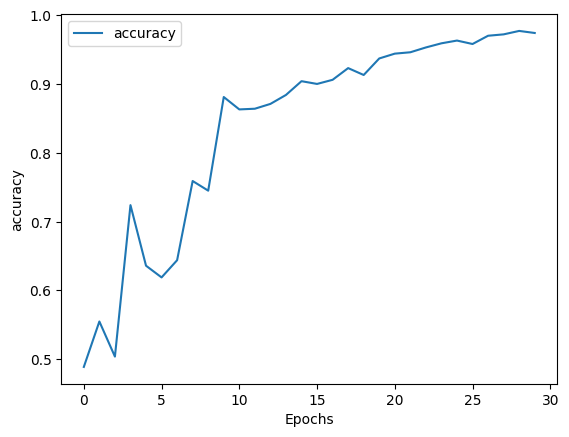

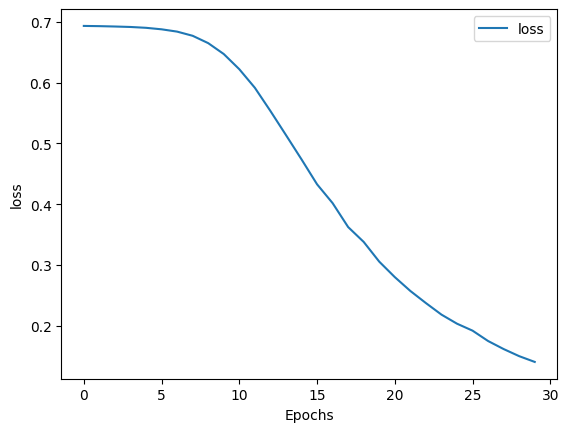

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

wow loved this place ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Not tasty and the texture was just nasty.
0


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#   word = reverse_word_index[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["The food is perfect, but is horrible."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))


1/1 [==============================] - 0s 87ms/step
[[0.57079166]]


In [ ]:
sentence = ["The food is horrible."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 30ms/step
[[0.2657965]]
